# Load data

In [2]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize


sys.path.append(os.path.abspath('./ml_higgs-master/'))

In [277]:
def find_first_line(lines, phrase):
    for i, line in enumerate(lines):
        if phrase in line:
            return i


def read_raw_root(name, num_particles):
    with open(name) as f:
        lines = f.readlines()
    # Filter out unnecessary lines.
    # The interesting lines start with the first "TUPLE" and end at "Analysed in total".
    lines = lines[find_first_line(lines, "TUPLE"):find_first_line(lines, "Analysed in total:")]
    # Ignore debug lines.
    lines = [line for line in lines if not line.startswith("Analysed:")]
    # Find ids of lines that start descriptions of examples.
    ids = [int(idx) for idx, line in enumerate(lines) if line.startswith("TUPLE")]
    # Ensure that there are `num_particles` particles for each example.
    assert ids == list(range(0, num_particles * len(ids), num_particles))
    print(len(lines), len(ids)*num_particles)
    # If the numbers are not equal, check the last lines of pythia file 
    assert len(lines) == num_particles * len(ids)
    lines = [line.strip() for line in lines]

    num_examples = len(ids)

    weights = [float(lines[num_particles * i].strip().split()[1]) for i in range(num_examples)]
    weights = np.array(weights)

    values = [list(map(float, " ".join(lines[num_particles * i + 1: num_particles * (i + 1)]).split()))
              for i in range(num_examples)]
    values = np.array(values)

    return values, weights

In [278]:
data, weights = read_raw_root('./pythia.H.rhorho.1M.a.scalar.outTUPLE_labFrame', num_particles=7)
concat = np.concatenate((data, weights.reshape(-1, 1)), axis=1)
np.save('rhorho.scalar.npy', concat)

7000000 7000000


In [279]:
data, weights = read_raw_root('./pythia.H.rhorho.1M.a.pseudoscalar.outTUPLE_labFrame', num_particles=7)
concat = np.concatenate((data, weights.reshape(-1, 1)), axis=1)
np.save('rhorho.pseudoscalar.npy', concat)

7000000 7000000


KeyboardInterrupt: 

In [ ]:
data, weights = read_raw_root('./pythia.H.rhorho.1M.a.CPmix_02.outTUPLE_labFrame', num_particles=7)
concat = np.concatenate((data, weights.reshape(-1, 1)), axis=1)
np.save('rhorho.CPmix_02.npy', concat)

In [ ]:
data, weights = read_raw_root('./pythia.H.rhorho.1M.a.CPmix_03.outTUPLE_labFrame', num_particles=7)
concat = np.concatenate((data, weights.reshape(-1, 1)), axis=1)
np.save('rhorho.CPmix_03.npy', concat)

In [ ]:
data, weights = read_raw_root('./pythia.H.rhorho.1M.a.CPmix_04.outTUPLE_labFrame', num_particles=7)
concat = np.concatenate((data, weights.reshape(-1, 1)), axis=1)
np.save('rhorho.CPmix_04.npy', concat)

# Prepare

In [280]:
concat = np.load('rhorho.scalar.npy')

In [281]:
data, weights = concat[:, :30], concat[:, 30]

In [282]:
from particle import Particle

p = [Particle(data[:, 5 * i:5 * i + 4]) for i in range(6)]

In [283]:
p[0].x.shape

(1000000,)

(array([  2.,   4.,  10.,  26., 119., 564., 199.,  50.,  20.,   6.]),
 array([-89.282576 , -73.5378398, -57.7931036, -42.0483674, -26.3036312,
        -10.558895 ,   5.1858412,  20.9305774,  36.6753136,  52.4200498,
         68.164786 ]),
 <a list of 10 Patch objects>)

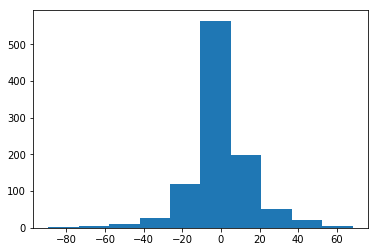

In [284]:
plt.hist(np.random.choice(p[1].x,1000))

(array([101.,  88., 113.,  99., 117., 107.,  83., 113.,  94.,  85.]),
 array([0.00866289, 0.63560366, 1.26254442, 1.88948519, 2.51642596,
        3.14336672, 3.77030749, 4.39724826, 5.02418903, 5.65112979,
        6.27807056]),
 <a list of 10 Patch objects>)

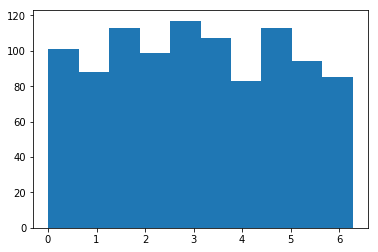

In [285]:
plt.hist(np.random.choice(p[1].angle_phi,1000))

(array([756.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 244.]),
 array([0.        , 0.62831853, 1.25663706, 1.88495559, 2.51327412,
        3.14159265, 3.76991118, 4.39822972, 5.02654825, 5.65486678,
        6.28318531]),
 <a list of 10 Patch objects>)

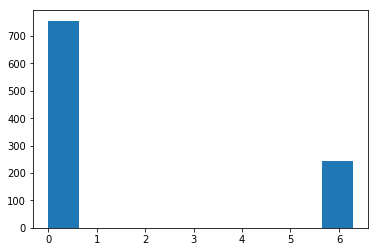

In [286]:
plt.hist(np.random.choice(p[1].rotate_xy(-p[1].angle_phi).angle_phi,1000))

(array([239., 104.,  59.,  51.,  40.,  49.,  42.,  69., 101., 246.]),
 array([6.89735627e-04, 3.14733762e-01, 6.28777789e-01, 9.42821815e-01,
        1.25686584e+00, 1.57090987e+00, 1.88495390e+00, 2.19899792e+00,
        2.51304195e+00, 2.82708598e+00, 3.14113000e+00]),
 <a list of 10 Patch objects>)

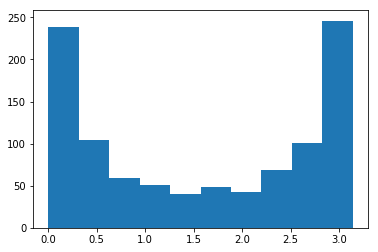

In [287]:
plt.hist(np.random.choice(p[1].angle_theta,1000))

(array([638., 137.,  84.,  61.,  34.,  17.,  13.,   5.,   7.,   4.]),
 array([1.80663384e-06, 1.30374308e-01, 2.60746810e-01, 3.91119311e-01,
        5.21491813e-01, 6.51864315e-01, 7.82236816e-01, 9.12609318e-01,
        1.04298182e+00, 1.17335432e+00, 1.30372682e+00]),
 <a list of 10 Patch objects>)

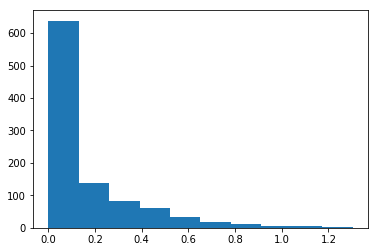

In [288]:
plt.hist(np.random.choice(p[1].rotate_xy(-p[1].angle_phi).rotate_xz(-p[1].angle_theta).angle_theta,1000))

(array([  2.,   1.,   4.,  20., 243., 682.,  34.,   7.,   3.,   4.]),
 array([-858.478746 , -689.3495262, -520.2203064, -351.0910866,
        -181.9618668,  -12.832647 ,  156.2965728,  325.4257926,
         494.5550124,  663.6842322,  832.813452 ]),
 <a list of 10 Patch objects>)

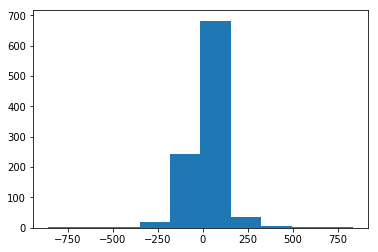

In [289]:
plt.hist(np.random.choice(p[1].z,1000))

(array([  1.,   3.,  13.,  56., 815.,  77.,  24.,   7.,   2.,   2.]),
 array([-779.52599106, -602.96989598, -426.4138009 , -249.85770581,
         -73.30161073,  103.25448436,  279.81057944,  456.36667453,
         632.92276961,  809.47886469,  986.03495978]),
 <a list of 10 Patch objects>)

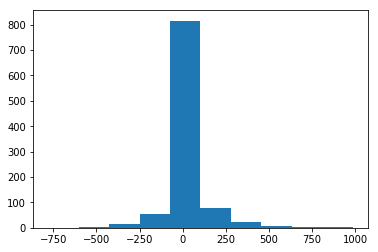

In [290]:
plt.hist(np.random.choice(p[1].boost_along_z(30, 100).z,1000))

(array([809., 109.,  34.,  23.,   6.,  10.,   3.,   0.,   3.,   3.]),
 array([4.48458000e-01, 9.08259388e+01, 1.81203420e+02, 2.71580900e+02,
        3.61958381e+02, 4.52335862e+02, 5.42713343e+02, 6.33090824e+02,
        7.23468304e+02, 8.13845785e+02, 9.04223266e+02]),
 <a list of 10 Patch objects>)

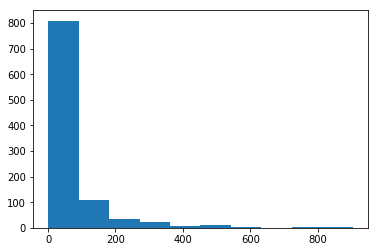

In [291]:
plt.hist(np.random.choice(p[1].e, 1000))

# CP-mix dependencies

In [13]:
data = [(0, 'rhorho.scalar.npy') , (0.2, 'rhorho.CPmix_02.npy'), (0.3, 'rhorho.CPmix_03.npy'), (0.4, 'rhorho.CPmix_04.npy'), (1, 'rhorho.pseudoscalar.npy')]
data

[(0, 'rhorho.scalar.npy'),
 (0.2, 'rhorho.CPmix_02.npy'),
 (0.3, 'rhorho.CPmix_03.npy'),
 (0.4, 'rhorho.CPmix_04.npy'),
 (1, 'rhorho.pseudoscalar.npy')]

In [14]:
def get_weigths(name):
    concat = np.load(name)
    weights = concat[:, 30]
    return np.array(weights)

In [15]:
w = np.vstack([get_weigths(name) for i, name in data])
    

In [17]:
w.shape

(5, 1000000)

(array([281953.,      0.,  47797.,      0.,      0.,  32074.,      0.,
        202587.,      0., 435589.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

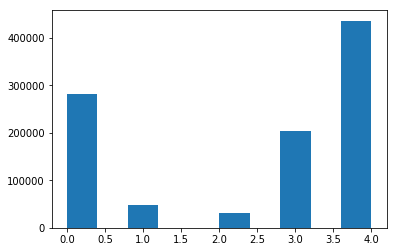

In [21]:
plt.hist(np.argmax(w, axis=0))

In [ ]:
data = ['/Users/msadowski/Downloads/rhorho_raw.w_00.npy', '/Users/msadowski/Downloads/rhorho_raw.w_01.npy', '/Users/msadowski/Downloads/rhorho_raw.w_00.npy']

In [6]:
x = np.array([0, 0.2, 0.3, 0.4, 1]) 

In [7]:
i = 209

In [8]:
def weight_fun(x, a, b, c):
    x = x*np.pi/2
    return a + b*np.cos(2*x) + c*np.sin(2*x)

In [9]:
popt, pcov = optimize.curve_fit(weight_fun, x, w[:, i], p0=[1, 1, 1])

[ 0.68201258 -0.28323763  0.10515595]


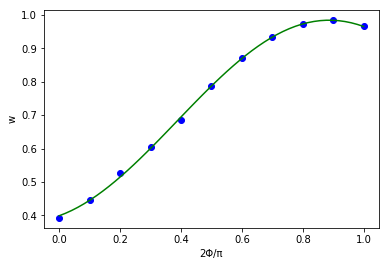

In [13]:
plt.plot(x, w[:, i], 'bo')
xw = np.array([0.1, 0.5, 0.6, 0.7, 0.8, 0.9])
plt.plot(xw, weight_fun(xw, *popt), 'bo')
x_ = np.linspace(0, 1)
plt.plot(x_, weight_fun(x_, *popt), 'g')
plt.ylabel('w')
plt.xlabel('2\u03A6/\u03C0')
print(popt)

In [ ]:
maxi = np.arctan(-0.12981862/-0.49801906)
maxi + np.pi

In [302]:
w6 =[]
w8 = []
for i in range(w.shape[1]):
    popt, pcov = optimize.curve_fit(weight_fun, x, w[:, i], p0=[1, 1, 1])
    w6.append(weight_fun(0.6*np.pi/2, *popt))
    w8.append(weight_fun(0.6*np.pi/2, *popt))
    if i % 1000 == 0:
        print(i, end='\r')

KeyboardInterrupt: 

In [31]:
w6a = np.array(w6)

In [32]:
w8a = np.array(w8)

In [34]:
w6a.shape

(1000000,)

In [20]:
np.load('./ml_higgs-master/data/rhorho_raw.w_a.npy')

array([1.569551, 1.626878, 0.800728, ..., 1.975514, 0.460329, 1.616711])

In [36]:
np.save('./ml_higgs-master/data/rhorho_raw.w_a08.npy', w8a)

# Plots

## Model-Oracle 
python main.py -t nn_rhorho -i $RHORHO_DATA -e 50 -f Model-Oracle -d 0.2 -l 6 -s 300

In [26]:
logs = """EPOCH: 1 . 1.356 . 1.126 . 1.107 . 1.096 . 1.088 . 1.082 . 1.077 . 1.073 . 1.070 . 1.067 TRAIN LOSS: 1.064 AUC: 0.729 VALID AUC: 0.729
EPOCH: 2 . 1.039 . 1.038 . 1.037 . 1.036 . 1.036 . 1.035 . 1.035 . 1.034 . 1.034 . 1.033 TRAIN LOSS: 1.033 AUC: 0.743 VALID AUC: 0.743
EPOCH: 3 . 1.031 . 1.028 . 1.028 . 1.028 . 1.027 . 1.027 . 1.027 . 1.027 . 1.027 . 1.027 TRAIN LOSS: 1.026 AUC: 0.750 VALID AUC: 0.748
EPOCH: 4 . 1.023 . 1.023 . 1.024 . 1.024 . 1.024 . 1.024 . 1.024 . 1.024 . 1.024 . 1.023 TRAIN LOSS: 1.023 AUC: 0.750 VALID AUC: 0.750
EPOCH: 5 . 1.024 . 1.022 . 1.022 . 1.022 . 1.022 . 1.022 . 1.022 . 1.022 . 1.022 . 1.022 TRAIN LOSS: 1.022 AUC: 0.752 VALID AUC: 0.752
EPOCH: 6 . 1.026 . 1.021 . 1.021 . 1.021 . 1.021 . 1.021 . 1.020 . 1.020 . 1.020 . 1.020 TRAIN LOSS: 1.020 AUC: 0.754 VALID AUC: 0.754
EPOCH: 7 . 1.016 . 1.019 . 1.020 . 1.019 . 1.019 . 1.019 . 1.019 . 1.019 . 1.019 . 1.019 TRAIN LOSS: 1.019 AUC: 0.754 VALID AUC: 0.754
EPOCH: 8 . 1.019 . 1.019 . 1.019 . 1.019 . 1.018 . 1.018 . 1.019 . 1.019 . 1.019 . 1.019 TRAIN LOSS: 1.019 AUC: 0.755 VALID AUC: 0.755
EPOCH: 9 . 1.016 . 1.018 . 1.018 . 1.018 . 1.018 . 1.018 . 1.018 . 1.018 . 1.018 . 1.018 TRAIN LOSS: 1.018 AUC: 0.757 VALID AUC: 0.756
EPOCH: 10 . 1.009 . 1.017 . 1.017 . 1.017 . 1.017 . 1.017 . 1.017 . 1.017 . 1.017 . 1.017 TRAIN LOSS: 1.017 AUC: 0.757 VALID AUC: 0.757
EPOCH: 11 . 1.017 . 1.017 . 1.017 . 1.017 . 1.017 . 1.017 . 1.017 . 1.017 . 1.017 . 1.017 TRAIN LOSS: 1.017 AUC: 0.758 VALID AUC: 0.757
EPOCH: 12 . 1.012 . 1.017 . 1.017 . 1.017 . 1.017 . 1.017 . 1.017 . 1.017 . 1.017 . 1.017 TRAIN LOSS: 1.016 AUC: 0.758 VALID AUC: 0.757
EPOCH: 13 . 1.015 . 1.016 . 1.016 . 1.016 . 1.016 . 1.016 . 1.016 . 1.016 . 1.016 . 1.016 TRAIN LOSS: 1.016 AUC: 0.758 VALID AUC: 0.758
EPOCH: 14 . 1.016 . 1.016 . 1.016 . 1.016 . 1.016 . 1.016 . 1.016 . 1.016 . 1.016 . 1.016 TRAIN LOSS: 1.016 AUC: 0.758 VALID AUC: 0.758
EPOCH: 15 . 1.018 . 1.015 . 1.016 . 1.016 . 1.016 . 1.016 . 1.016 . 1.016 . 1.016 . 1.016 TRAIN LOSS: 1.016 AUC: 0.760 VALID AUC: 0.758
EPOCH: 16 . 1.012 . 1.015 . 1.015 . 1.015 . 1.015 . 1.015 . 1.015 . 1.015 . 1.015 . 1.015 TRAIN LOSS: 1.015 AUC: 0.757 VALID AUC: 0.759
EPOCH: 17 . 1.019 . 1.015 . 1.015 . 1.015 . 1.015 . 1.015 . 1.015 . 1.015 . 1.015 . 1.015 TRAIN LOSS: 1.015 AUC: 0.757 VALID AUC: 0.759
EPOCH: 18 . 1.014 . 1.015 . 1.015 . 1.015 . 1.015 . 1.015 . 1.015 . 1.015 . 1.015 . 1.015 TRAIN LOSS: 1.015 AUC: 0.760 VALID AUC: 0.759
EPOCH: 19 . 1.015 . 1.015 . 1.015 . 1.015 . 1.015 . 1.015 . 1.015 . 1.015 . 1.015 . 1.015 TRAIN LOSS: 1.015 AUC: 0.759 VALID AUC: 0.759
EPOCH: 20 . 1.020 . 1.015 . 1.015 . 1.014 . 1.015 . 1.014 . 1.014 . 1.015 . 1.015 . 1.015 TRAIN LOSS: 1.015 AUC: 0.759 VALID AUC: 0.759
EPOCH: 21 . 1.011 . 1.014 . 1.014 . 1.014 . 1.014 . 1.014 . 1.014 . 1.014 . 1.014 . 1.014 TRAIN LOSS: 1.014 AUC: 0.759 VALID AUC: 0.759
EPOCH: 22 . 1.007 . 1.014 . 1.014 . 1.014 . 1.014 . 1.014 . 1.014 . 1.014 . 1.014 . 1.014 TRAIN LOSS: 1.014 AUC: 0.760 VALID AUC: 0.760
EPOCH: 23 . 1.010 . 1.014 . 1.014 . 1.014 . 1.014 . 1.014 . 1.014 . 1.014 . 1.014 . 1.014 TRAIN LOSS: 1.014 AUC: 0.759 VALID AUC: 0.759
EPOCH: 24 . 1.012 . 1.015 . 1.014 . 1.014 . 1.014 . 1.014 . 1.014 . 1.014 . 1.014 . 1.014 TRAIN LOSS: 1.014 AUC: 0.760 VALID AUC: 0.760
EPOCH: 25 . 1.010 . 1.014 . 1.014 . 1.014 . 1.014 . 1.014 . 1.014 . 1.014 . 1.014 . 1.014 TRAIN LOSS: 1.014 AUC: 0.761 VALID AUC: 0.760"""

In [27]:
valid = []
for l in logs.split('\n'):
    valid.append(float(l.split()[-1]))


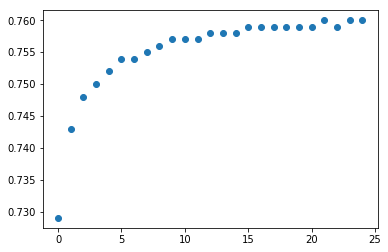

In [28]:
plt.plot(valid, 'o')

## Model-OnlyHad 
python main.py -t nn_rhorho -i $RHORHO_DATA -e 50 -f Model-OnlyHad -d 0.2 -l 6 -s 300

In [21]:
logs="""EPOCH: 1 . 1.343 . 1.126 . 1.112 . 1.105 . 1.100 . 1.096 . 1.093 . 1.091 . 1.089 . 1.088 TRAIN LOSS: 1.087 AUC: 0.628 VALID AUC: 0.631
EPOCH: 2 . 1.078 . 1.077 . 1.077 . 1.077 . 1.076 . 1.076 . 1.076 . 1.076 . 1.076 . 1.076 TRAIN LOSS: 1.076 AUC: 0.633 VALID AUC: 0.633
EPOCH: 3 . 1.075 . 1.075 . 1.075 . 1.075 . 1.075 . 1.075 . 1.075 . 1.075 . 1.075 . 1.075 TRAIN LOSS: 1.075 AUC: 0.636 VALID AUC: 0.635
EPOCH: 4 . 1.075 . 1.074 . 1.074 . 1.074 . 1.074 . 1.074 . 1.074 . 1.074 . 1.074 . 1.074 TRAIN LOSS: 1.074 AUC: 0.633 VALID AUC: 0.636
EPOCH: 5 . 1.077 . 1.074 . 1.074 . 1.074 . 1.074 . 1.074 . 1.074 . 1.074 . 1.074 . 1.074 TRAIN LOSS: 1.074 AUC: 0.634 VALID AUC: 0.635
EPOCH: 6 . 1.072 . 1.074 . 1.074 . 1.074 . 1.074 . 1.074 . 1.074 . 1.074 . 1.074 . 1.074 TRAIN LOSS: 1.074 AUC: 0.637 VALID AUC: 0.636
EPOCH: 7 . 1.072 . 1.073 . 1.074 . 1.074 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 TRAIN LOSS: 1.073 AUC: 0.635 VALID AUC: 0.637
EPOCH: 8 . 1.074 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 TRAIN LOSS: 1.073 AUC: 0.637 VALID AUC: 0.637
EPOCH: 9 . 1.074 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 TRAIN LOSS: 1.073 AUC: 0.635 VALID AUC: 0.637
EPOCH: 10 . 1.073 . 1.074 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 TRAIN LOSS: 1.073 AUC: 0.635 VALID AUC: 0.637
EPOCH: 11 . 1.078 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 TRAIN LOSS: 1.073 AUC: 0.636 VALID AUC: 0.638
EPOCH: 12 . 1.070 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 TRAIN LOSS: 1.073 AUC: 0.638 VALID AUC: 0.638
EPOCH: 13 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 TRAIN LOSS: 1.073 AUC: 0.637 VALID AUC: 0.638
EPOCH: 14 . 1.072 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 TRAIN LOSS: 1.073 AUC: 0.637 VALID AUC: 0.638
EPOCH: 15 . 1.072 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 TRAIN LOSS: 1.073 AUC: 0.637 VALID AUC: 0.638
EPOCH: 16 . 1.072 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 TRAIN LOSS: 1.073 AUC: 0.637 VALID AUC: 0.638
EPOCH: 17 . 1.076 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 TRAIN LOSS: 1.073 AUC: 0.636 VALID AUC: 0.638
EPOCH: 18 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 . 1.073 TRAIN LOSS: 1.073 AUC: 0.637 VALID AUC: 0.638
EPOCH: 19 . 1.073 . 1.072 . 1.072 . 1.072 . 1.072 . 1.072 . 1.072 . 1.073 . 1.073 . 1.072 TRAIN LOSS: 1.073 AUC: 0.637 VALID AUC: 0.638
EPOCH: 20 . 1.070 . 1.073 . 1.072 . 1.072 . 1.073 . 1.072 . 1.072 . 1.072 . 1.072 . 1.072 TRAIN LOSS: 1.072 AUC: 0.638 VALID AUC: 0.638
EPOCH: 21 . 1.070 . 1.072 . 1.072 . 1.072 . 1.072 . 1.072 . 1.072 . 1.072 . 1.073 . 1.073 TRAIN LOSS: 1.072 AUC: 0.639 VALID AUC: 0.638
EPOCH: 22 . 1.068 . 1.072 . 1.072 . 1.072 . 1.072 . 1.072 . 1.072 . 1.072 . 1.072 . 1.072 TRAIN LOSS: 1.072 AUC: 0.636 VALID AUC: 0.638
EPOCH: 23 . 1.071 . 1.073 . 1.073 . 1.072 . 1.072 . 1.073 . 1.072 . 1.072 . 1.072 . 1.072 TRAIN LOSS: 1.072 AUC: 0.638 VALID AUC: 0.638
EPOCH: 24 . 1.072 . 1.072 . 1.072 . 1.072 . 1.072 . 1.072 . 1.072 . 1.072 . 1.072 . 1.072 TRAIN LOSS: 1.072 AUC: 0.638 VALID AUC: 0.639"""

In [22]:
valid = []
for l in logs.split('\n'):
    valid.append(float(l.split()[-1]))



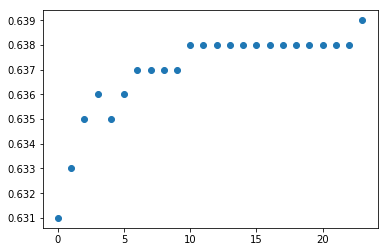

In [24]:
plt.plot(valid, 'o')

In [1]:
import numpy as np

In [7]:
np.load('./ml_higgs-master/data/rhorho_raw.perm.npy').shape

(1000000,)

In [58]:
a = np.load('./ml_higgs-master/data/rhorho_raw.w_a.npy')
wa02 = np.load("./ml_higgs-master/data/rhorho_raw.w_a02.npy")
wa04 = np.load("./ml_higgs-master/data/rhorho_raw.w_a04.npy")
wa06 = np.load("./ml_higgs-master/data/rhorho_raw.w_a06.npy")
wa08 = np.load("./ml_higgs-master/data/rhorho_raw.w_a08.npy")

In [59]:
b = np.load('./ml_higgs-master/data/rhorho_raw.w_b.npy')

In [64]:
np.save("./ml_higgs-master/data/rhorho_raw.w.npy", np.stack([a, wa02, wa04, wa06, wa08 , b], axis=1), )

In [66]:
np.linspace(0, 1, 6)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [41]:
ps = np.load('./ml_higgs-master/ps.npy')
ps2 = np.load('./ml_higgs-master/ps2.npy')

Text(0.5,0,'2Φ/π')

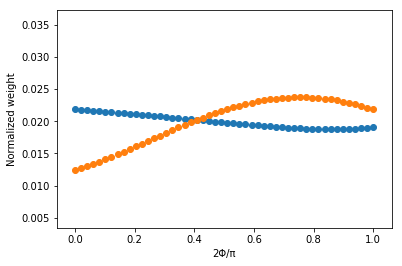

In [80]:
i = 1800
plt.scatter(np.linspace(0,1, 50), ps[i])
plt.scatter(np.linspace(0,1, 50), ps2[i]/np.sum(ps2[i]))
plt.ylabel('Normalized weight')
plt.xlabel('2\u03A6/\u03C0')

In [81]:
np.argmax(ps, axis=1)==np.argmax(ps2, axis=1)

array([False, False, False, ...,  True, False,  True])

In [84]:
def weight_fun(x, a, b, c):
    return a + b * np.cos(x) + c * np.sin(x)

In [91]:
ropts = np.load('./ml_higgs-master/ropts.npy')
ropts2 = np.load('./ml_higgs-master/ropts2.npy')

In [115]:
x = np.linspace(0, np.pi, 1000)

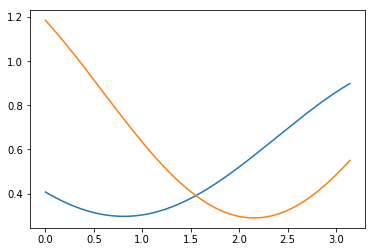

In [141]:
i = 1002
plt.plot(x, weight_fun(x, *ropts[i]))
plt.plot(x, weight_fun(x, *ropts2[i]))

In [129]:
res = 0
for i in range(1000):
    res += np.sum((np.argmax(weight_fun(x, *ropts[i]))/1000 - np.argmax(weight_fun(x, *ropts2[i]))/1000)**2)

In [131]:
res/1000

0.28511001099999966

In [ ]:
plt.scatter()

In [13]:
popts = np.load('./ml_higgs-master/data/popts.npy')

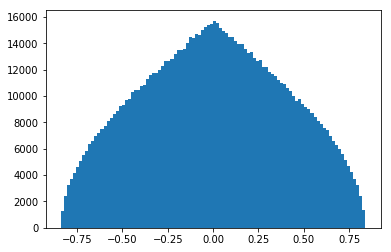

In [270]:
plt.hist(popts[:,1], bins=100)
plt.show()

In [261]:
popts[0, :]

array([0.86551671, 0.62738729, 0.33164053])

# Analysis

In [225]:
x=np.linspace(0,2*np.pi)
y=np.cos(x)

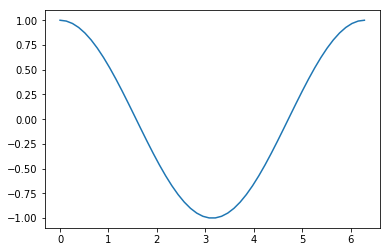

In [226]:
plt.plot(x, y)

In [227]:
from scipy.stats import wasserstein_distance, energy_distance

In [229]:
c =0
alphas = np.linspace(0, 2*np.pi)
y_orig =np.cos(x + 0.4*np.pi)

kls = []
for alpha in alphas:
    kls.append(1/energy_distance(y_orig, np.cos(x+alpha)))


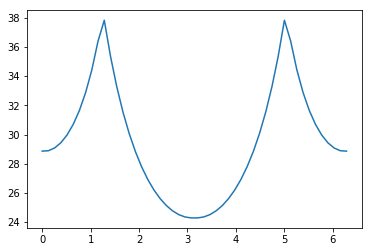

In [230]:
plt.plot(alphas, kls)

array([100.        , 100.12822827, 100.25645654, 100.38468481,
       100.51291309, 100.64114136, 100.76936963, 100.8975979 ,
       101.02582617, 101.15405444, 101.28228272, 101.41051099,
       101.53873926, 101.66696753, 101.7951958 , 101.92342407,
       102.05165235, 102.17988062, 102.30810889, 102.43633716,
       102.56456543, 102.6927937 , 102.82102197, 102.94925025,
       103.07747852, 103.20570679, 103.33393506, 103.46216333,
       103.5903916 , 103.71861988, 103.84684815, 103.97507642,
       104.10330469, 104.23153296, 104.35976123, 104.48798951,
       104.61621778, 104.74444605, 104.87267432, 105.00090259,
       105.12913086, 105.25735913, 105.38558741, 105.51381568,
       105.64204395, 105.77027222, 105.89850049, 106.02672876,
       106.15495704, 106.28318531])

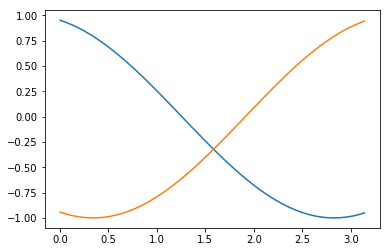

In [152]:
plt.plot(x, np.cos(x + 0.1*np.pi))
plt.plot(x, np.cos(x + 2.8))

# TEST

In [234]:
import numpy as np

In [238]:
a00 = np.load('/Users/msadowski/Downloads/rhorho_raw.w_00.npy')
a01 = np.load('/Users/msadowski/Downloads/rhorho_raw.w_01.npy')
a02 = np.load('/Users/msadowski/Downloads/rhorho_raw.w_02.npy')
a03 = np.load('/Users/msadowski/Downloads/rhorho_raw.w_03.npy')
a04 = np.load('/Users/msadowski/Downloads/rhorho_raw.w_04.npy')
a05 = np.load('/Users/msadowski/Downloads/rhorho_raw.w_05.npy')
a06 = np.load('/Users/msadowski/Downloads/rhorho_raw.w_06.npy')
a07 = np.load('/Users/msadowski/Downloads/rhorho_raw.w_07.npy')
a08 = np.load('/Users/msadowski/Downloads/rhorho_raw.w_08.npy')
a09 = np.load('/Users/msadowski/Downloads/rhorho_raw.w_09.npy')
a10 = np.load('/Users/msadowski/Downloads/rhorho_raw.w_10.npy')

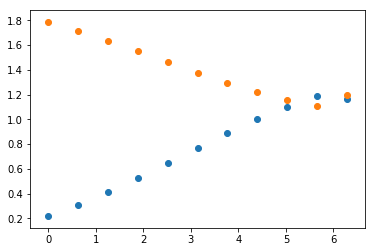

In [257]:
for i in [20, 60]:
    b = [a00[i], a01[i],a02[i], a03[i],a04[i], a05[i],a06[i], a07[i], a08[i], a09[i],a10[i]]
    plt.scatter(np.linspace(0, 2*np.pi, 11), b)

# Test maxs

In [7]:
maxs =np.load('./ml_higgs-master/results_20.npy')

(array([23744.,  6794.,  5047.,  2929.,  1290.,  1566.,  1636.,  1658.,
         1858., 53478.]),
 array([ 0. ,  4.9,  9.8, 14.7, 19.6, 24.5, 29.4, 34.3, 39.2, 44.1, 49. ]),
 <a list of 10 Patch objects>)

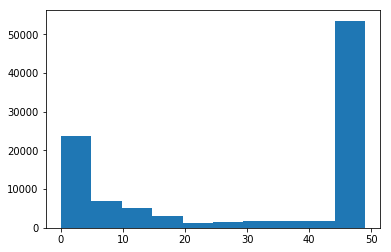

In [8]:
plt.hist(maxs)

In [9]:
maxs_all =np.load('./ml_higgs-master/results_20_all.npy')

(array([23768.,  5101.,  6022.,  5299.,  5169.,  2289.,   927.,  2108.,
         2436., 46881.]),
 array([ 0. ,  4.9,  9.8, 14.7, 19.6, 24.5, 29.4, 34.3, 39.2, 44.1, 49. ]),
 <a list of 10 Patch objects>)

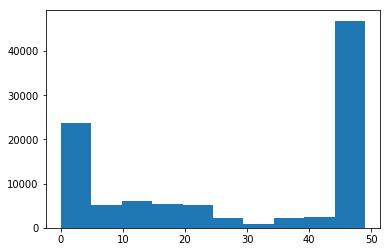

In [10]:
plt.hist(maxs_all)

(array([182420.,  53274.,  62605.,  57476.,  44741.,  34156.,  28539.,
         26281.,  27979., 282529.]),
 array([ 0. ,  4.9,  9.8, 14.7, 19.6, 24.5, 29.4, 34.3, 39.2, 44.1, 49. ]),
 <a list of 10 Patch objects>)

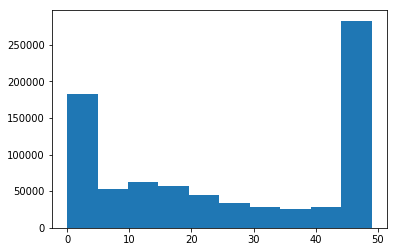

In [11]:
plt.hist(np.load('./ml_higgs-master/maxW.npy'))

(array([ 91449.,  26459.,  31278.,  28801.,  22375.,  17084.,  14118.,
         13205.,  14113., 141845.]),
 array([ 0. ,  4.9,  9.8, 14.7, 19.6, 24.5, 29.4, 34.3, 39.2, 44.1, 49. ]),
 <a list of 10 Patch objects>)

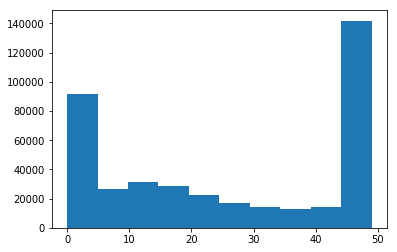

In [12]:
plt.hist(np.load('./ml_higgs-master/maxW_unw.npy'))